In [15]:
                                                                                                                                                                                                    import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # regression of classification
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score

In [16]:
df = pd.read_csv("/content/sample_data/cars.csv")

In [17]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


In [19]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,201.030651,106.360153,3004.122605,15.547893,1976.819923
std,7.823570,1.733310,108.853214,40.499959,856.129151,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2245.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2835.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3672.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [20]:
#df.describe(include = 'o')
df.dtypes

,0
mpg,float64
cylinders,int64
cubicinches,int64
hp,int64
weightlbs,int64
time-to-60,int64
year,int64
brand,object


In [21]:
df.shape

(261, 8)

In [22]:
df.isnull().sum()

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


In [23]:
df['brand'].unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [24]:
le = LabelEncoder()
le.fit(df["brand"])
df['brand'] = le.transform(df['brand'])

In [25]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,2
1,31.9,4,89,71,1925,14,1980,0
2,17.0,8,302,140,3449,11,1971,2
3,15.0,8,400,150,3761,10,1971,2
4,30.5,4,98,63,2051,17,1978,2


In [26]:
X = df.drop('brand', axis = 1)
y = df['brand']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [28]:
model = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_features = 3, max_depth = 3)

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

In [30]:
graph_data = open("graph.dot", 'w')
export_graphviz(model, out_file = graph_data, filled = True, special_characters = True, feature_names = list(X_train.columns), class_names = list(le.classes_), rounded = True)
graph_data.close()

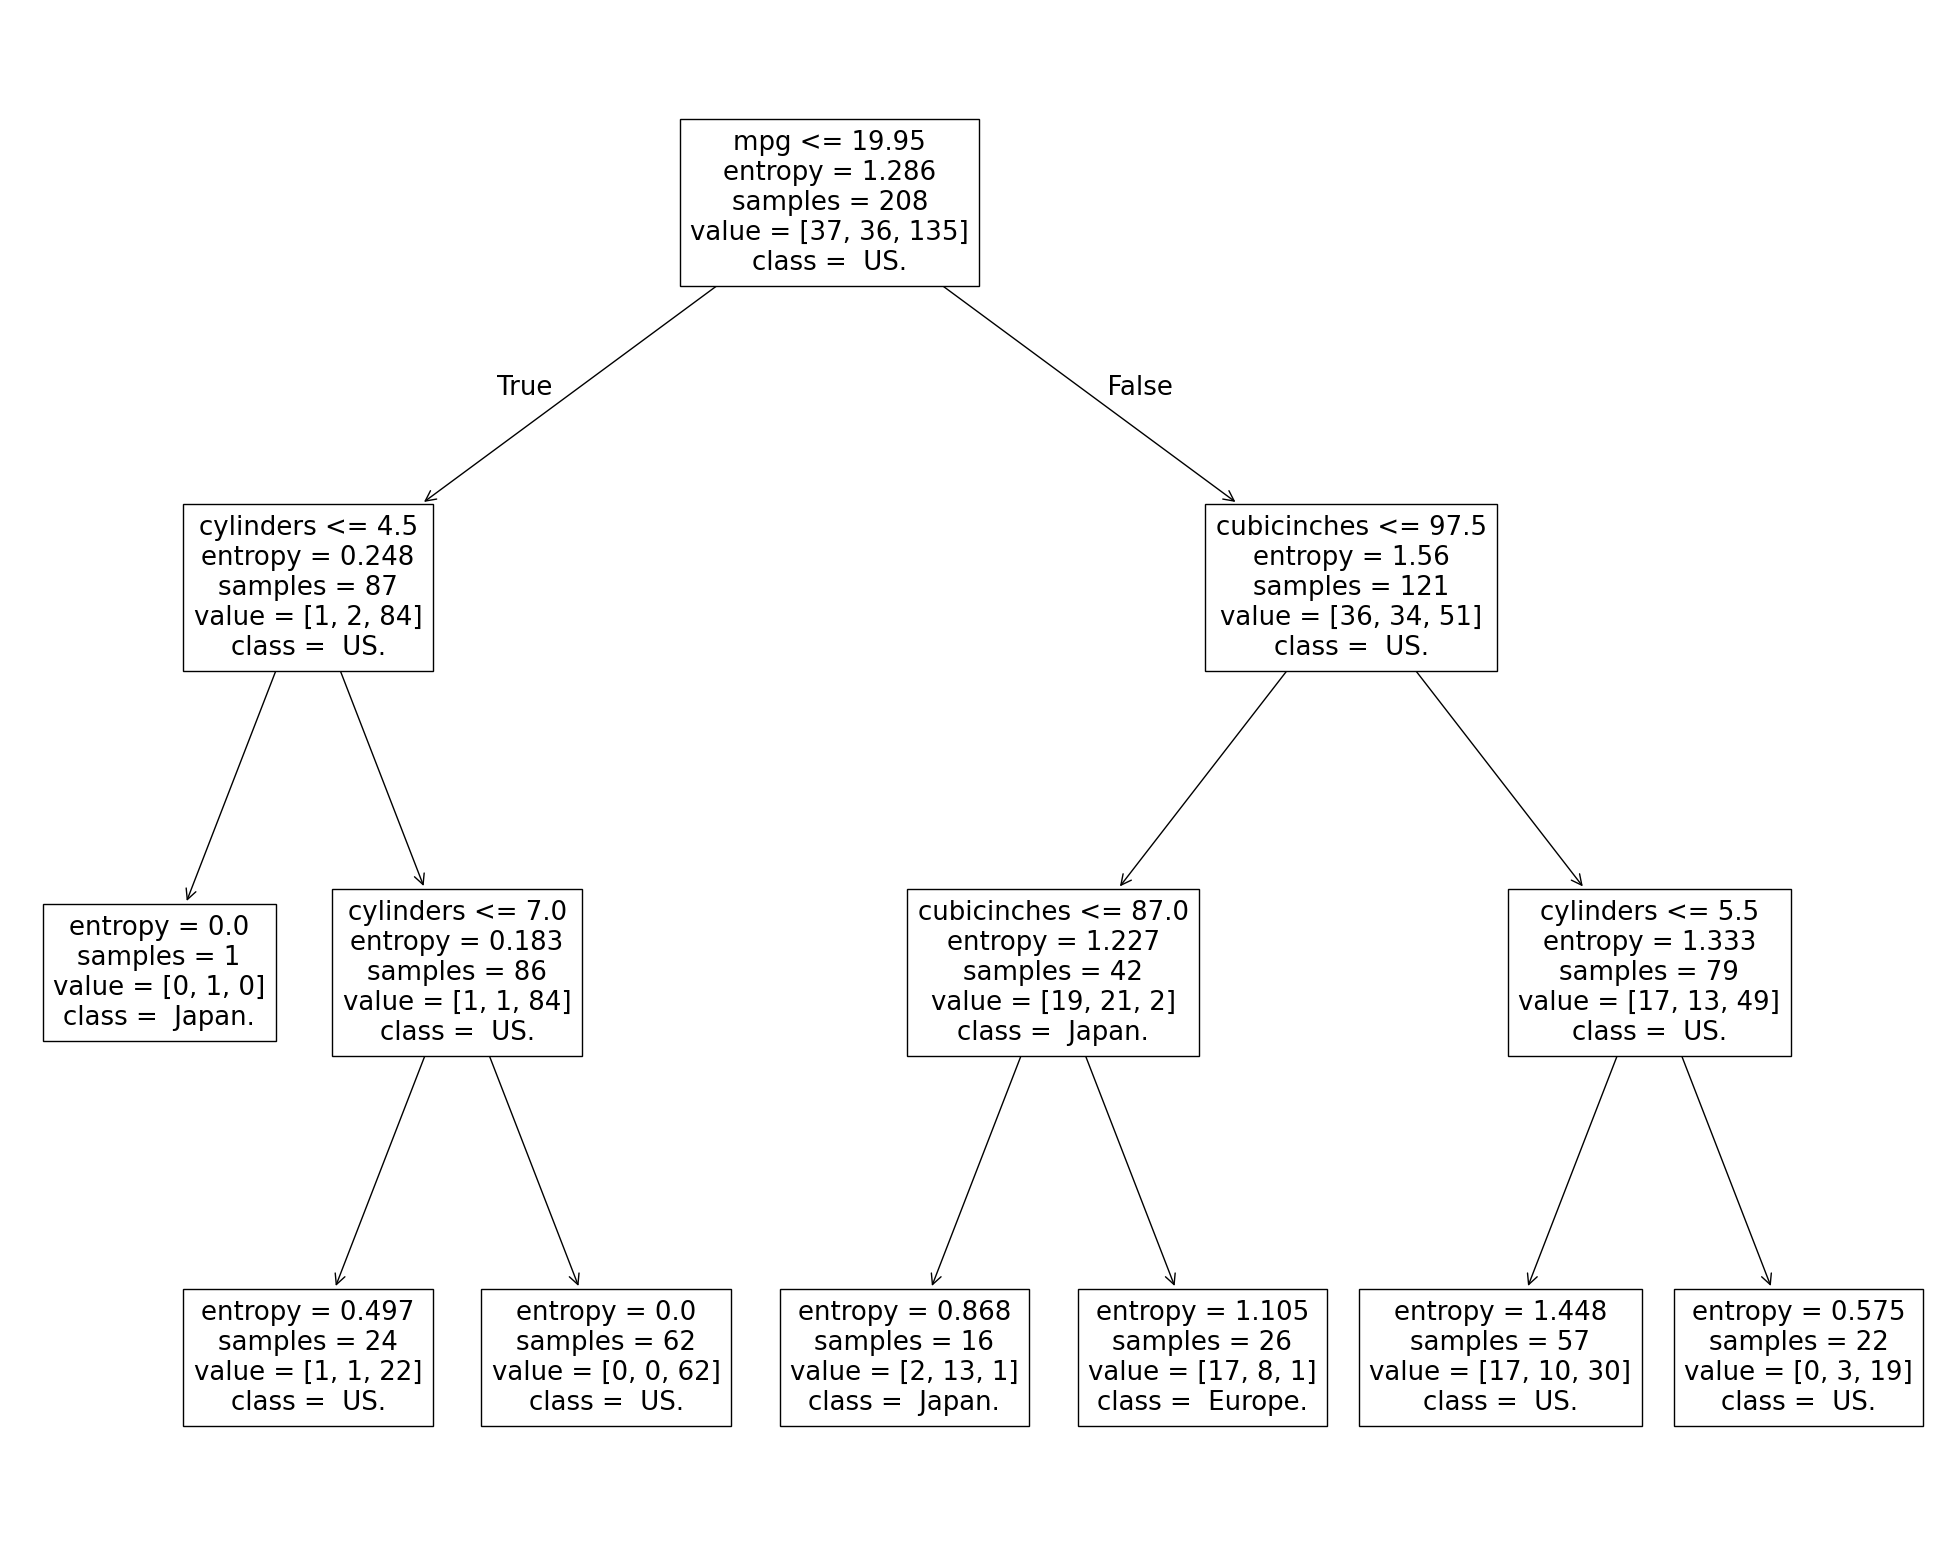

In [31]:
plt.figure(figsize = (25, 20))
plot_tree(model,class_names = list(le.classes_), feature_names = list(X_train.columns))
plt.show()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2])

In [33]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.5283018867924528


In [34]:
'''
Selecting the features
'''
features = pd.DataFrame({"Features": X_train.columns, "Importance":np.round(model.feature_importances_, 3)})
features = features.sort_values(by = "Importance", ascending = False)

In [35]:
features

,Features,Importance
0,mpg,0.485
2,cubicinches,0.347
1,cylinders,0.168
3,hp,0.000
4,weightlbs,0.000
5,time-to-60,0.000
6,year,0.000


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score

In [37]:
car_df = pd.read_csv("/content/sample_data/cars.csv")

In [38]:
car_df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [39]:
car_df.isnull().sum()

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


In [40]:
car_df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,201.030651,106.360153,3004.122605,15.547893,1976.819923
std,7.823570,1.733310,108.853214,40.499959,856.129151,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2245.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2835.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3672.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [41]:
lb = LabelEncoder()
lb.fit(car_df['brand'])
car_df['brand'] = lb.transform(car_df['brand'])

In [42]:
X = car_df.drop('brand', axis = 1)
y = car_df['brand']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [44]:
rf_car = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, random_state=42)

In [45]:
rf_car.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(0.5416666666666666, 0.875, 'cubicinches <= 169.5\nentropy = 1.284\nsamples = 128\nvalue = [40, 33, 135]\nclass =  US.'),
 Text(0.3333333333333333, 0.625, 'cubicinches <= 132.5\nentropy = 1.569\nsamples = 62\nvalue = [39.0, 33.0, 27.0]\nclass =  Europe.'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'mpg <= 26.5\nentropy = 1.483\nsamples = 49\nvalue = [39.0, 25.0, 15.0]\nclass =  Europe.'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.787\nsamples = 19\nvalue = [28, 5, 1]\nclass =  Europe.'),
 Text(0.25, 0.125, 'entropy = 1.541\nsamples = 30\nvalue = [11, 20, 14]\nclass =  Japan.'),
 Text(0.5, 0.375, 'hp <= 92.5\nentropy = 0.971\nsamples = 13\nvalue = [0, 8, 12]\nclass =  US.'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 12]\nclass =  US.'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 8, 0]\nclass =  Japan.'),
 Text(0.75, 0.625, 'year <= 1979.5\nentropy = 0.075\nsamples = 66\nvalue = [1, 0, 108]

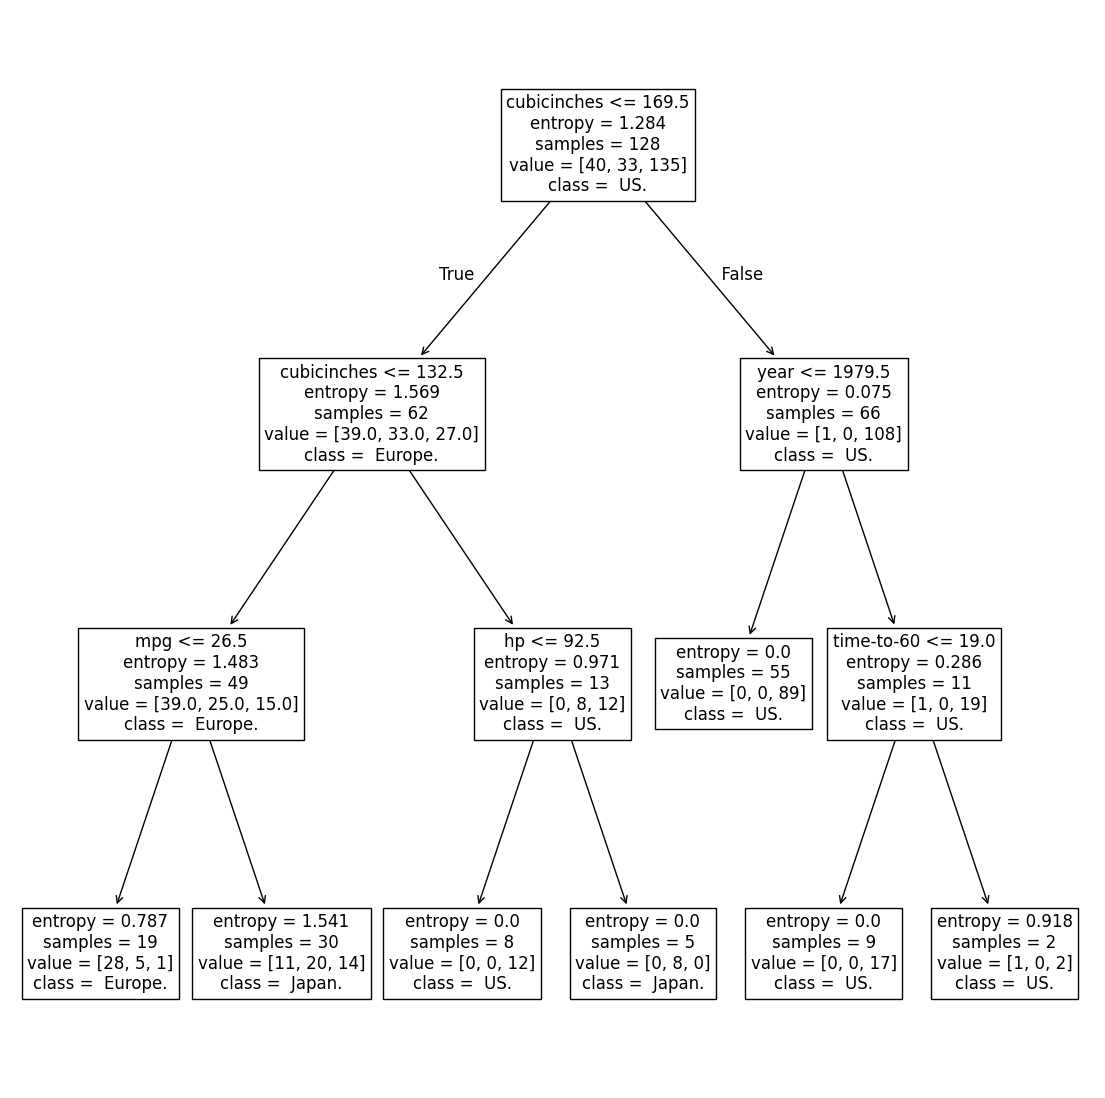

In [55]:
plt.figure(figsize = (14,14))
plot_tree(rf_car.estimators_[5], feature_names = list(X_train.columns), class_names = list(lb.classes_), fontsize = 12)